#### Linear Regression Models
- Deals with Continues numerical data
- Specifically, they are used to model the relationship between a dependent variable (which is also typically numeric) and one or more independent variables (also usually numeric). The goal is to find a linear equation that best fits the data, allowing for predictions of the dependent variable based on the independent variables

#### To Split the data:-
from sklearn.model_selection import train_test_split

x_train_cgpa,x_test_cgpa,y_train_pkg,y_test_pkg = train_test_split(x_train_cgpa_data,y_train_package_data,test_size=0.2,random_state=42)
- Note1:- If test size is not given, default is 75%
- Note2:- Important Attributes Description
- random_state = 42 >>> if we run multiple times, it rememebers the records seleccted for ID 42. As long as we keep random_state same, it selects the same records in the test sample.
- test_size - Default value if test_size is not given = 75%
#### To Train the data:-
from sklearn.linear_model import LinearRegression

my_model = LinearRegression()

my_model.fit(x_train_cgpa,y_train_pkg)

#### To Predict the outcome:-
y_predict_sales = my_model.predict(x_testTVRadioNews)

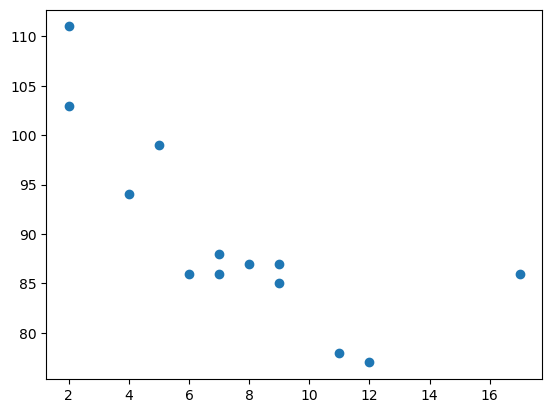

In [3]:
# Draw scatterplot for the below data

import matplotlib.pyplot as plt

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

#### linregress() function in statistics.
- The linregress function in Python, found within the scipy.stats module, is a tool for performing simple linear regression.
- It calculates the linear least-squares regression for two sets of measurements, providing key statistical parameters of the regression line.
- .
- The linregress function returns five values:
- slope: The slope of the regression line.
- intercept: The y-intercept of the regression line.
- r_value: The Pearson correlation coefficient, indicating the strength and direction of the linear relationship.
- p_value: The two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero.
- std_err: The standard error of the estimated slop

Slope value is:  -1.7512877115526118
Intercept Value is:  103.10596026490066
R value is : -0.758591524376155
p value is : 0.0026468739224561064
Standard error is  0.453536157607742


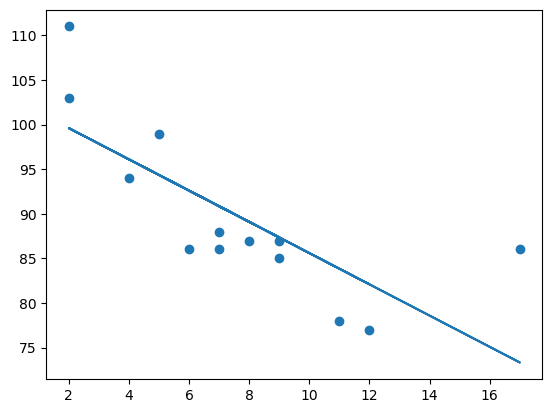

In [6]:
# Calculate the slope, intercept, standard error and also best linear line for the below input values.
# Slope(y), Intercept(c) is calculated by using the linregress function.
# Using slope and intercept draw the best linear line. y = mx+c

import matplotlib.pyplot as plt
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

print("Slope value is: ", slope)
print("Intercept Value is: ", intercept)
print("R value is :", r)
print("p value is :", p)
print("Standard error is ",std_err)

# Calculate the y = mx + c for each value of x
def myfunc(x):
  return slope * x + intercept

# Send each value of x and calculate the value of y and store in a list.
mymodel = list(map(myfunc, x))
#print(mymodel.sort)

# Now draw the scatter plot with the input values
plt.scatter(x, y)

# Draw the line plot using the input of x and derived y values.
plt.plot(x, mymodel)
plt.show()

#99,86,87,88,111,86,103,87,94,78,77,85,86

### Use linear regression model for the placement data
- Fit the placement data i.e. input the cgpa (x) and package(y) and later predict the package based on the cgpa.

In [9]:
# Impor the placements file.

import pandas as pd
import numpy as np

placement_data = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\placement.csv")

In [11]:
# See the overall data of the file.

placement_data.describe

<bound method NDFrame.describe of      cgpa  package
0    6.89     3.26
1    5.12     1.98
2    7.82     3.25
3    7.42     3.67
4    6.94     3.57
..    ...      ...
195  6.93     2.46
196  5.89     2.57
197  7.21     3.24
198  7.63     3.96
199  6.22     2.33

[200 rows x 2 columns]>

In [13]:
placement_data.head(5)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [15]:
# Check if there are any null values in the data

placement_data.isnull().sum()

cgpa       0
package    0
dtype: int64

In [17]:
# Check the shape, i.e. the number of records and number of columns in the dataset

placement_data.shape

(200, 2)

In [19]:
# Get the columns to be trained

x_train_cgpa_data = placement_data[['cgpa']]
y_train_package_data = placement_data[['package']]

In [21]:
len(x_train_cgpa_data)

200

In [23]:
len(y_train_package_data)

200

In [39]:
# Create a new dataframe that has only students with cgpa > 9
# Only to understand filtering in dataframe, nothing to do with the model

cgps_df_gt9 = placement_data[placement_data.cgpa > 9]
cgps_df_gt9

,cgpa,package
40,9.38,4.02
50,9.58,4.43
51,9.26,3.79
63,9.16,4.25
116,9.04,3.33
164,9.06,3.82
169,9.31,4.37


In [26]:
# Give the above x and y data to train, test, split function to create a separate data sets for x,y train and test

from sklearn.model_selection import train_test_split

x_train_cgpa,x_test_cgpa,y_train_pkg,y_test_pkg = train_test_split(x_train_cgpa_data,y_train_package_data)
#x_train_cgpa,x_test_cgpa,y_train_pkg,y_test_pkg = train_test_split(x_train_cgpa_data,y_train_package_data,test_size=0.2,random_state=42)

In [28]:
print(x_train_cgpa.shape)
print(x_test_cgpa.shape)
print(y_train_pkg.shape)
print(y_test_pkg.shape)

(150, 1)
(50, 1)
(150, 1)
(50, 1)


In [30]:
# Create a model and train the model with the data

from sklearn.linear_model import LinearRegression

#LinearRegression is a class >>> Create object for this class to use it
my_model = LinearRegression()

# Creates a model, by creating lines and selecting the best possible line and derives m and c
my_model.fit(x_train_cgpa,y_train_pkg)

LinearRegression()

In [32]:
# y = mx +c
# slope m, value

my_model.coef_

array([[0.57774661]])

In [34]:
# y = mx + c 
# intercept c, Value

my_model.intercept_

array([-1.04617281])

In [36]:
# Check for one test value manually and compare it with the predicted value later

x_test_cgpa.head(1)

,cgpa
84,4.26


In [38]:
# Predict for one x = 8.35
# Y = mx + c

(0.55592883 * 8.35) - 0.8975993

3.7444064305

In [40]:
# Predict the package for test input data

y_predict_pkg = my_model.predict(x_test_cgpa)
len(y_predict_pkg)

50

In [42]:
# Create a dataframe from predict package for easy indexing later to use joins for test and predicted data
df_y_predict_pkg = pd.DataFrame(y_predict_pkg)
df_y_test_pkg = pd.DataFrame(y_test_pkg)
df_y_test_pkg = df_y_test_pkg.reset_index(drop=True)

# Rename column names for y predict and y test
df_y_predict_pkg.rename(columns={0: 'y_predict_pkg'}, inplace=True)
df_y_test_pkg.rename(columns={'package': 'y_test_pkg'}, inplace=True)

In [44]:
# Join the test and predicted packages to see them side by side

df_test_package = pd.merge(df_y_test_pkg,df_y_predict_pkg,how='inner',left_index=True, right_index=True)
df_test_package.head(5)

,y_test_pkg,y_predict_pkg
0,1.53,1.415028
1,2.48,2.853617
2,3.64,3.050051
3,4.06,3.639352
4,2.72,3.159822


In [46]:
# Test the prediction by using Mean Absolute Error method - |predicted value - actual value|N
# Manually

MAE_Manual = sum(abs(df_test_package.y_predict_pkg - df_test_package.y_test_pkg))/50
MAE_Manual

0.2748502536942166

In [48]:
# By using the formula, calculate the MAE, MSQE, RMSQE

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

MAE_Formula = mean_absolute_error(df_y_test_pkg, df_y_predict_pkg)
print("MAE ", MAE_Formula)

mse_value = mean_squared_error(df_y_test_pkg, df_y_predict_pkg)
print("mse_value ",mse_value)

RMSE = root_mean_squared_error(df_y_test_pkg, df_y_predict_pkg)
print("RMSE ",RMSE)

R2Score = r2_score(df_y_test_pkg, df_y_predict_pkg)
print("R2Score ",R2Score)

MAE  0.2748502536942166
mse_value  0.12006238650885188
RMSE  0.34650019698241424
R2Score  0.7935424851597177


In [50]:
# Check if manually calculated value and the formula value for MAE is same

MAE_Formula - MAE_Manual

0.0

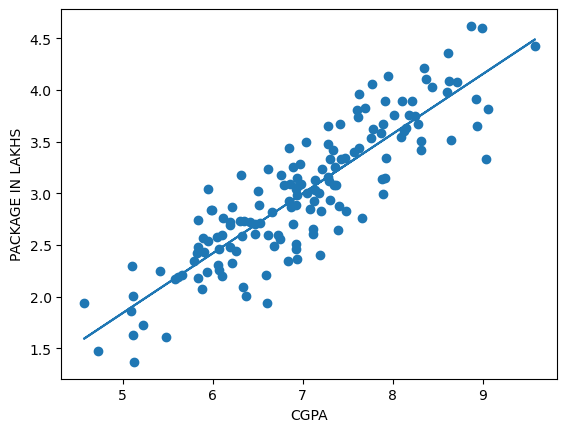

In [52]:
# Create a 
# scatterplot with the input/output values and 
# linear regression line created test input/predicted values

#x_train_cgpa,x_test_cgpa,y_train_pkg,y_test_pkg

import matplotlib.pyplot as plt

plt.xlabel('CGPA')
plt.ylabel('PACKAGE IN LAKHS')
plt.scatter(x_train_cgpa,y_train_pkg)
plt.plot(x_train_cgpa,my_model.predict(x_train_cgpa))
#plt.plot(x_test_cgpa,my_model.predict(x_test_cgpa))

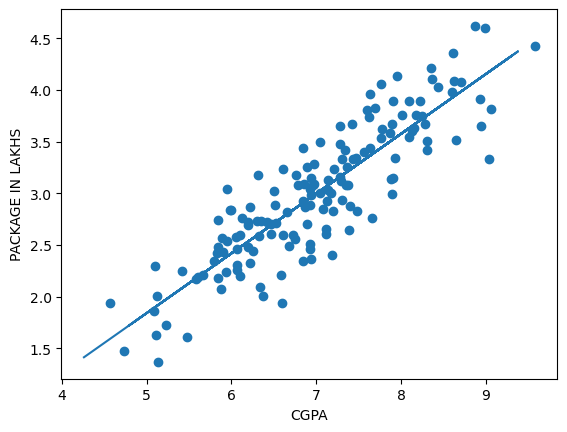

In [54]:
plt.xlabel('CGPA')
plt.ylabel('PACKAGE IN LAKHS')
plt.scatter(x_train_cgpa,y_train_pkg)
plt.plot(x_test_cgpa,my_model.predict(x_test_cgpa))

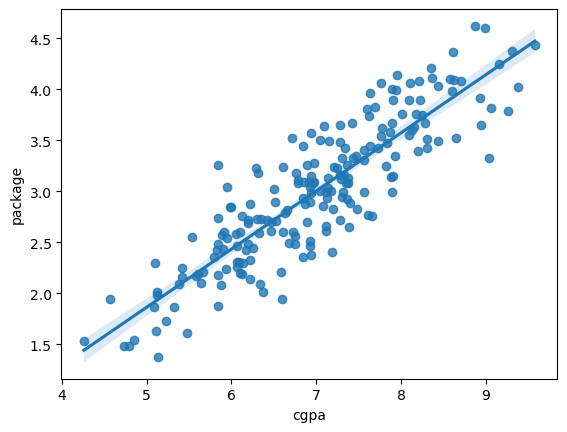

In [90]:
#### Draw Linear Regression Line using Reg Plot

import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
# 'x' and 'y' specify the columns to be plotted
sns.regplot(x=x_train_cgpa_data, y=y_train_package_data)

# Display the plot
plt.show()

#### Read from input file and write to a different file with the predicted values.

In [57]:
# Read some values from an input csv file and predict their values and write it to the csv file.

csv_cgpa = pd.read_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\InputCGPA.csv")
csv_cgpa.head(5)

,cgpa
0,5.0
1,9.1
2,11.0
3,3.0
4,2.5


In [59]:
my_model.predict(csv_cgpa[['cgpa']])

array([[1.84256023],
       [4.21132132],
       [5.30903988],
       [0.68706701],
       [0.39819371]])

In [61]:
# Create a new column in the csv_cgpa dataframe and write the predicted values there

csv_cgpa[['Package Predicted']] = my_model.predict(csv_cgpa[['cgpa']])

In [63]:
# Check the csv_cgpa data after column is added

csv_cgpa

,cgpa,Package Predicted
0,5.0,1.842560
1,9.1,4.211321
2,11.0,5.309040
3,3.0,0.687067
4,2.5,0.398194


In [65]:
# Test manually

# y = mx +c
# slope m, value

my_model.coef_

array([[0.57774661]])

In [67]:
# y = mx + c 
# intercept c, Value

my_model.intercept_

array([-1.04617281])

In [69]:
(5.0*0.55592883)-0.8975993

1.8820448500000002

In [71]:
# Write the updated column to the existing file

csv_cgpa.to_csv(r"C:\Users\ACER\Desktop\Kranthi\DataScience_Desktop\MachineLearningFiles\InputCGPA_OutputPredictPackage.csv",index=False)